Define Paths to COAsT and data

In [25]:
import sys
sys.path.insert(0,'/home/users/jholt/Git/COAsT/')
path_data="/home/users/jholt/SENEMO/Subsets_909_989_382_509"
file_config_T=f"{path_data}/senemo_grid_t.json"
file_data=f"{path_data}/SENEMO_1m_20150101_20151231_grid_T_201509-201509.nc"

What's in the config file?

In [26]:
import os
os.system(f"more {file_config_T}")

::::::::::::::
/home/users/jholt/SENEMO/Subsets_909_989_382_509/senemo_grid_t.json
::::::::::::::
{
	"type": "gridded",
	"dimensionality": 3,
	"chunks": {"time_counter":2},
	"grid_ref": {
		"t-grid": [
			"glamt",
			"gphit",
			"e1t",
			"e2t",
			"e3t_0",
			"deptht_0",
			"tmask",
			"bottom_level",
			"mbathy",
			"hbatt"
		]
	},
	"dataset": {
		"dimension_map": {
			"time_counter": "t_dim",
			"deptht": "z_dim",
			"nav_lev": "z_dim",
			"y": "y_dim",
			"x": "x_dim",
			"x_grid_T": "x_dim",
			"y_grid_T": "y_dim"
		},
		"variable_map": {
			"time_counter": "time",
			"votemper": "temperature",
			"thetao": "temperature",
			"temp": "temperature",
			"toce": "temperature",
                        "thetao_con":  "temperature",
			"so": "salinity",
			"vosaline": "salinity",
			"soce": "salinity",
                        "so_abs": "salinity",
			"sossheig": "ssh",
			"zos": "ssh"
		},
		"coord_vars": [
			"longitude",
			"latitude",
			"time",
			"depth_0"
		]
	},
	"domain": {
		"di

0

In [3]:
import coast
import numpy as np
import matplotlib.pylab as plt

Make a Gridded object

In [32]:
nemo = coast.Gridded(fn_data=file_data,config = file_config_T)

/home/users/jholt/Git/COAsT/coast/_utils/logging_util.py:79: UserWarning: /home/users/jholt/Git/COAsT/coast/data/gridded.py._setup_grid_obj.85: No NEMO domain specified, only limited functionality will be available
  return warnings.warn(add_info(msg), *args, **kwargs)


In [33]:
nemo.dataset

<xarray.Dataset>
Dimensions:                (y_dim: 128, x_dim: 81, nvertex: 4, z_dim: 75,
                            axis_nbounds: 2, t_dim: 1)
Coordinates:
    latitude               (y_dim, x_dim) float32 dask.array<chunksize=(128, 81), meta=np.ndarray>
    longitude              (y_dim, x_dim) float32 dask.array<chunksize=(128, 81), meta=np.ndarray>
    deptht                 (z_dim) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered          (t_dim) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time                   (t_dim) datetime64[ns] 2015-09-16
Dimensions without coordinates: y_dim, x_dim, nvertex, z_dim, axis_nbounds,
                                t_dim
Data variables: (12/35)
    bounds_nav_lon         (y_dim, x_dim, nvertex) float32 dask.array<chunksize=(128, 81, 4), meta=np.ndarray>
    bounds_nav_lat         (y_dim, x_dim, nvertex) float32 dask.array<chunksize=(128, 81, 4), meta=np.ndarray>
    area                   (y_dim, x_dim) float32 dask.array<chunksize=(128, 81), meta=np.ndarray>
    deptht_bounds          (z_dim, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    time_centered_bounds   (t_dim, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds    (t_dim, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                     ...
    friver                 (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
    so_erp                 (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
    sfdsi                  (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
    sohflisf               (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
    sohfcisf               (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
    sowflisf               (t_dim, y_dim, x_dim) float32 dask.array<chunksize=(1, 128, 81), meta=np.ndarray>
Attributes:
    name:         SENEMO_1m_20150101_20151231_grid_T
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2022-Nov-23 14:26:36 GMT
    uuid:         99ce50ee-9cd6-4ed4-85c7-ea41f68b318e
    history:      Thu Aug 31 17:51:18 2023: ncea -d x,909,989 -d y,382,509 /g...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...

In [43]:
SST = nemo.dataset.temperature.values[0,0,:,:].squeeze()
lon = nemo.dataset.longitude.values
lat = nemo.dataset.latitude.values

In [44]:
SST.shape

(128, 81)

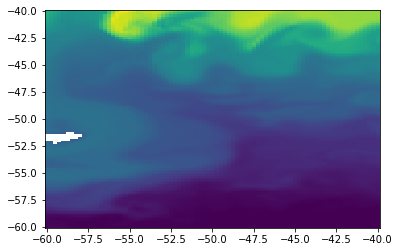

In [45]:
plt.pcolormesh(lon,lat,SST)